In [27]:
# there are some errors
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold,cross_val_score
from sklearn.neighbors import KNeighborsClassifier


In [28]:
data_url= 'https://raw.githubusercontent.com/Customer-Churn-Prediction/Project-Machine-Learning/master/Churning.csv'
data = pd.read_csv(data_url)
data.head()

,Account Length,VMail Message,Day Mins,Eve Mins,Night Mins,Intl Mins,CustServ Calls,Churn,Int'l Plan,VMail Plan,...,Day Charge,Eve Calls,Eve Charge,Night Calls,Night Charge,Intl Calls,Intl Charge,State,Area Code,Phone
0,128,25,265.1,197.4,244.7,10.0,1,0,0,1,...,45.07,99,16.78,91,11.01,3,2.70,KS,415,382-4657
1,107,26,161.6,195.5,254.4,13.7,1,0,0,1,...,27.47,103,16.62,103,11.45,3,3.70,OH,415,371-7191
2,137,0,243.4,121.2,162.6,12.2,0,0,0,0,...,41.38,110,10.30,104,7.32,5,3.29,NJ,415,358-1921
3,84,0,299.4,61.9,196.9,6.6,2,0,1,0,...,50.90,88,5.26,89,8.86,7,1.78,OH,408,375-9999
4,75,0,166.7,148.3,186.9,10.1,3,0,1,0,...,28.34,122,12.61,121,8.41,3,2.73,OK,415,330-6626


In [29]:
State_Churn = data.query('Churn==1').groupby(['State','Churn']).size()

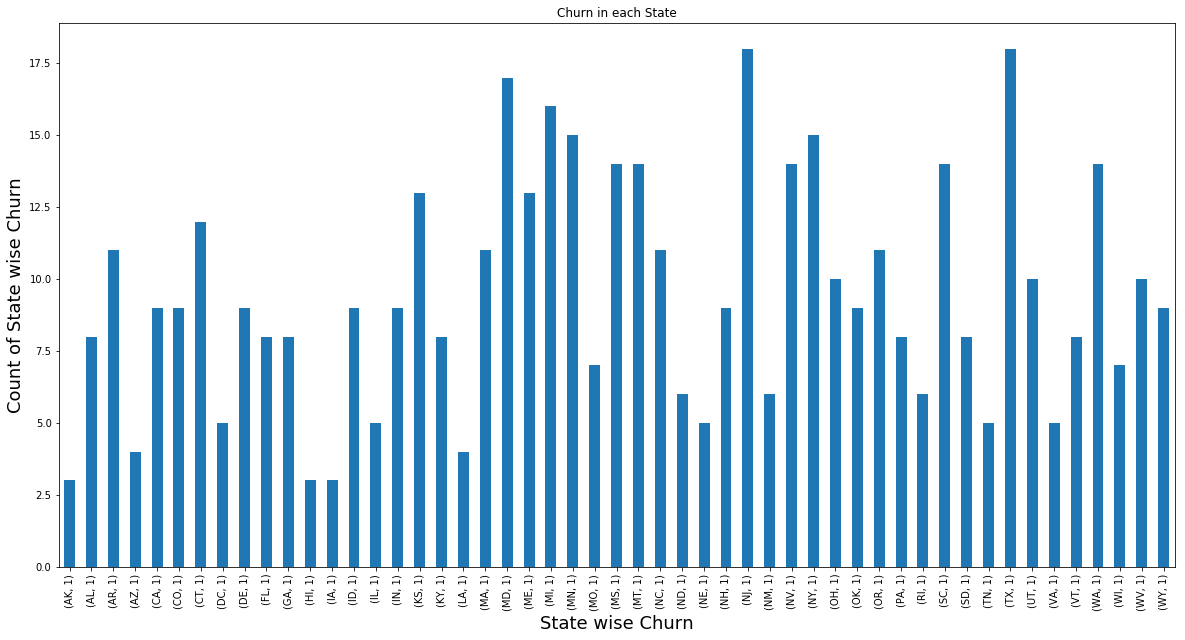

In [30]:
State_Churn.plot(kind='bar', figsize=(20,10))
plt.title('Churn in each State')
plt.xlabel('State wise Churn',fontsize=18)
plt.ylabel('Count of State wise Churn',fontsize=18)
plt.show()

In [31]:
target = np.array(data.Churn)
data= data.drop(['Churn','Phone'], axis=1)
data.head()

,Account Length,VMail Message,Day Mins,Eve Mins,Night Mins,Intl Mins,CustServ Calls,Int'l Plan,VMail Plan,Day Calls,Day Charge,Eve Calls,Eve Charge,Night Calls,Night Charge,Intl Calls,Intl Charge,State,Area Code
0,128,25,265.1,197.4,244.7,10.0,1,0,1,110,45.07,99,16.78,91,11.01,3,2.70,KS,415
1,107,26,161.6,195.5,254.4,13.7,1,0,1,123,27.47,103,16.62,103,11.45,3,3.70,OH,415
2,137,0,243.4,121.2,162.6,12.2,0,0,0,114,41.38,110,10.30,104,7.32,5,3.29,NJ,415
3,84,0,299.4,61.9,196.9,6.6,2,1,0,71,50.90,88,5.26,89,8.86,7,1.78,OH,408
4,75,0,166.7,148.3,186.9,10.1,3,1,0,113,28.34,122,12.61,121,8.41,3,2.73,OK,415


In [56]:
data.

SyntaxError: invalid syntax (<ipython-input-56-c0730a19bd56>, line 1)

In [ ]:
#train_x,test_x,train_y,test_y = train_test_split(data,target,test_size=0.3,random_state=0)
kf = KFold(n_splits=4)
kf.get_n_splits(data)

for train_index, test_index in kf.split(data):
    #print("TRAIN:", train_index, "TEST:", test_index)
    train_x, test_x = data.query('data.loc(train_index)'), data.query('data.loc(test_index)')
    train_y, test_y = target[train_index], target[test_index]
    #print(len(test_x))
    #print(len(train_x))

In [35]:
print(len(test_x))
print(len(train_x))

In [ ]:
features=data.columns[:17]
features

In [ ]:
estim=[]
estim.append(('clf',RandomForestClassifier(n_jobs=-1, random_state=0)))
estim.append(('knn',KNeighborsClassifier(n_neighbors=5, n_jobs=-1, metric='euclidean')))
model=Pipeline(estim)

In [11]:
clf = RandomForestClassifier(n_jobs=2,random_state=0)
clf.fit(train_x[features],train_y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=2,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [31]:
preds = clf.predict(test_x[features])
preds

array([0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0,

In [39]:
proba = clf.predict_proba(test_x[features])

In [40]:
from sklearn.metrics import confusion_matrix

In [41]:
cnf_mat = confusion_matrix(test_y, preds)
cnf_mat

array([[853,   9],
       [ 48,  90]], dtype=int64)

In [42]:
pd.crosstab(np.array(test_y),preds, rownames=['Actual Churn'], colnames=['Predicted Churn'])

Predicted Churn,0,1
Actual Churn,,
0,853,9
1,48,90


In [43]:
list(zip(train_x[features],clf.feature_importances_))

[('Account Length', 0.028841801758827029),
 ('VMail Message', 0.023482167415534987),
 ('Day Mins', 0.13349436736454884),
 ('Eve Mins', 0.063949169542698844),
 ('Night Mins', 0.041310712769688854),
 ('Intl Mins', 0.042660489052753041),
 ('CustServ Calls', 0.13085463570681738),
 ("Int'l Plan", 0.076326710145387847),
 ('VMail Plan', 0.033606645780348887),
 ('Day Calls', 0.035560795057509711),
 ('Day Charge', 0.14048915228026063),
 ('Eve Calls', 0.025466541627459753),
 ('Eve Charge', 0.057508498495710492),
 ('Night Calls', 0.021621182064049144),
 ('Night Charge', 0.047690875162190879),
 ('Intl Calls', 0.047499294451352973),
 ('Intl Charge', 0.049636961324860722)]

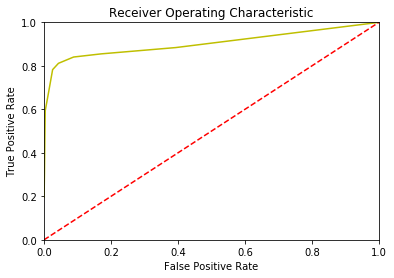

In [44]:
fpr, tpr, threshold = roc_curve(test_y,proba[:,1])
plt.title('Receiver Operating Characteristic')
plt.plot(fpr,tpr,'y')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

,importance,labels
10,0.140489,Day Charge
2,0.133494,Day Mins
6,0.130855,CustServ Calls
7,0.076327,Int'l Plan
3,0.063949,Eve Mins


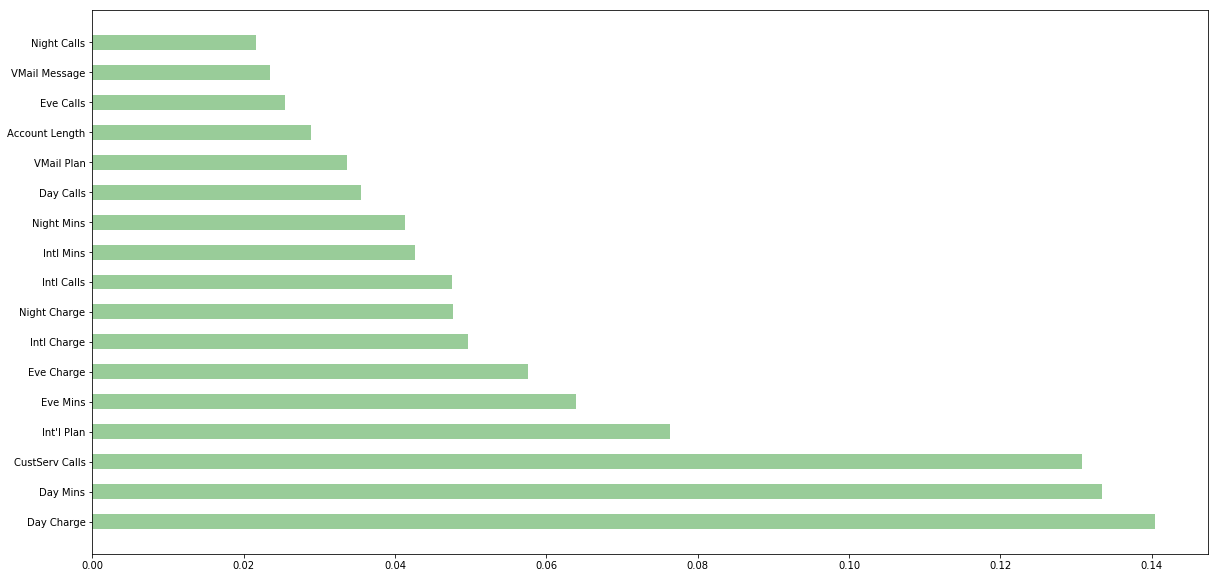

In [47]:
fig = plt.figure(figsize=(20, 10))
ax=fig.add_subplot(111)
df_f = pd.DataFrame (clf.feature_importances_,columns=["importance"])
df_f["labels"]=features
df_f.sort_values("importance",inplace=True,ascending=False)
display(df_f.head())

index=np.arange(len(clf.feature_importances_))
bar_width=0.5
rects= plt.barh(index, df_f["importance"],bar_width,alpha=0.4,color='g',label='Main')
plt.yticks(index,df_f["labels"])
plt.show()